In [1]:
# Установка необходимых библиотек
!pip install transformers torch wikipedia spacy rouge-score wordcloud ipywidgets -q
!python -m spacy download en_core_web_sm -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Импорт библиотек
import spacy
from transformers import BartForConditionalGeneration, BartTokenizer, T5ForConditionalGeneration, T5Tokenizer
import torch
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [4]:
# Встроенный текст для примера
article = """
Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions.
The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving.
The ideal characteristic of artificial intelligence is its ability to rationalize and take actions that have the best chance of achieving a specific goal.
AI research includes areas like machine learning, natural language processing, and robotics, which are advancing rapidly in the modern era.
"""

print("Оригинальный текст:")
print(article)

Оригинальный текст:

Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think like humans and mimic their actions. 
The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving. 
The ideal characteristic of artificial intelligence is its ability to rationalize and take actions that have the best chance of achieving a specific goal. 
AI research includes areas like machine learning, natural language processing, and robotics, which are advancing rapidly in the modern era.



In [5]:
# Предобработка текста
nlp = spacy.load("en_core_web_sm")
doc = nlp(article)
clean_text = " ".join([token.text for token in doc if not token.is_stop and not token.is_punct])

In [6]:
# Функция для суммаризации
def summarize_text(model_name, text, max_length=100):
    if model_name == "BART":
        model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
        tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
    else:  # T5
        model = T5ForConditionalGeneration.from_pretrained("t5-small")
        tokenizer = T5Tokenizer.from_pretrained("t5-small")
        text = "summarize: " + text  # Префикс для T5

    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs["input_ids"], max_length=max_length, min_length=30, length_penalty=2.0, num_beams=4)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [7]:
# Интерактивный выбор модели
model_selector = widgets.Dropdown(options=["BART", "T5"], value="BART", description="Выберите модель:")
display(model_selector)

Dropdown(description='Выберите модель:', options=('BART', 'T5'), value='BART')

In [11]:
# Функция для обработки выбора модели
def on_model_change(change):
    model_name = change["new"]
    print(f"\nГенерируем суммаризацию с помощью {model_name}...")
    summary = summarize_text(model_name, clean_text)
    print(f"\nСуммаризация ({model_name}):")
    print(summary)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(summary)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Облако слов для суммаризации ({model_name})")
    plt.show()

In [12]:
# Подключение функции к виджету
model_selector.observe(on_model_change, names="value")


Генерируем суммаризацию с помощью BART...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Суммаризация (BART):
itionally Artificial intelligence AI refers to simulation human intelligence machines programmed think like humans mimic actions. AI research includes areas like machine learning natural language processing robotics.


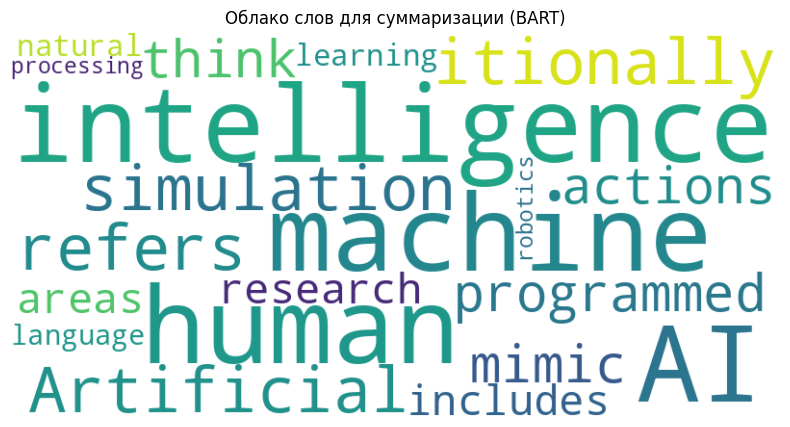

In [13]:
# Начальный запуск
on_model_change({"new": "BART"})